In [22]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

pns_data = pd.read_csv('national_pension.csv')
pns_data = pns_data.set_index(['Age_Group', 'Year'])
res_data = pd.read_csv('recipients_national_pension.csv')
res_data = res_data.set_index(['Age_Group', 'Year'])
yn_data = pd.read_csv('recipients_yn.csv')
yn_data = yn_data.set_index('Year')
per_data = pd.read_csv('korea_person.csv')
# per_data = per_data.set_index('Year')

# pns_data
# res_data
# yn_date

In [18]:
# 1. 년도별 1인당 부양수
include = ['Old_Pension', 'Disability_Pension', 'Survivor_Pension']

pns_gb_data = pns_data.groupby('Year').sum()
res_gb_data = res_data.groupby('Year').sum()

res_gb_data['Recipients_Total'] = res_gb_data[include].sum(axis=1)

# res_gb_data
# res_gb_data

graph_data = spt_data[['Recipients_Total', 'Subscriber_Count']]

In [17]:
spt_data = pns_gb_data.join(res_gb_data)
spt_data = spt_data.join(yn_data)

spt_data['Spt_Per'] = (spt_data['Recipients_Total'] / (spt_data['Subscriber_Count'] * spt_data['Npay_Per'] / 100) * 100)

spt_data

,Subscriber_Count,Old_Pension,Disability_Lsp,Disability_Pension,Survivor_Pension,Return_Lsp,Death_Lsp,Recipients_Total,Npay_Per,Spt_Per
Year,,,,,,,,,,
2012,15663881,2748455,2862,75934,496073,176531,18235,3320462,77.56000,27.33137
2013,16169339,2840660,2993,75041,536161,180233,18025,3451862,78.01000,27.36597
2014,16554121,2947422,2651,75387,575706,147035,21219,3598515,75.49000,28.79571
2015,17056789,3151349,2597,75688,617084,180705,23949,3844121,76.31000,29.53373
2016,17659255,3412350,2577,75497,659124,208620,26578,4146971,77.73000,30.21134
2017,17998055,3706516,2916,75486,705619,203449,22240,4487621,78.13000,31.91338
2018,18612582,3778824,3072,75734,756425,159967,20354,4610983,79.58000,31.13028
2019,18939569,4090497,3028,77872,808253,188851,21509,4976622,81.60000,32.20137
2020,19009014,4468126,2904,78079,857698,186422,22976,5403903,78.97000,35.99862


<Axes: xlabel='Year'>

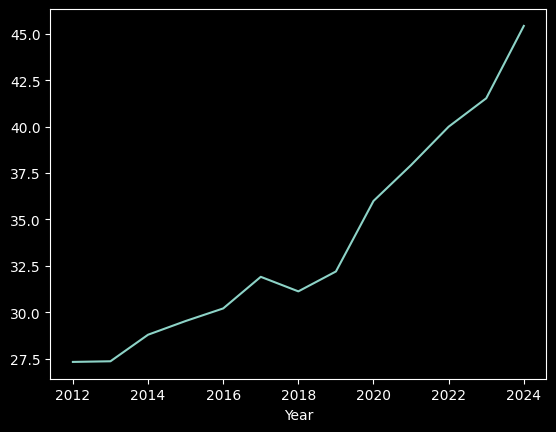

In [8]:
# 부양수 그래프
graph_data = spt_data['Spt_Per']

graph_data.plot.line()

In [5]:
# 미래 1인당 부양수 예측
# 단순 선형 회귀

In [ ]:
# 실질 금액

In [31]:
# 4. 미래 인구 구조 예측 (코호트 변화율법)
# 4-1. 로드 및 전처리
age_order = ['5-', '5~9', '10~14', '15~19', '20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', '65~69', '70~74', '75~79', '80+']
per_YA_pivot = per_data.pivot(index='Year', columns='Age_Grp', values='Population')
per_YA_pivot = per_YA_pivot[age_order]
years = per_YA_pivot.index.sort_values()

sr_data = []
br_data = []

per_YA_pivot

Age_Grp,5-,5~9,10~14,15~19,20~24,25~29,30~34,35~39,40~44,45~49,50~54,55~59,60~64,65~69,70~74,75~79,80+
Year,,,,,,,,,,,,,,,,,
2012,2321293,2347418,2955976,3491303,3319540,3307408,4062598,4106345,4639747,4196411,4405468,3386102,2428603,1899933,1774343,1196000,1109784
2013,2301320,2322614,2809185,3420530,3405202,3184327,4086122,3929292,4599684,4320277,4404070,3621186,2486668,1985888,1803037,1269763,1192298
2014,2294304,2297070,2663025,3325879,3488497,3153547,3917451,3894396,4528033,4402183,4370591,3845570,2626763,2079345,1800922,1345682,1294658
2015,2266781,2334907,2459825,3257264,3557583,3141465,3731387,3939579,4396186,4462807,4289141,4035650,2881662,2191617,1789894,1386543,1407047
2016,2204271,2361897,2349979,3131059,3541061,3217367,3517868,4016272,4212243,4584810,4182392,4242269,3139076,2237345,1781229,1457890,1519188
2017,2079115,2356083,2350767,2953658,3486427,3324540,3311945,4056704,4091743,4611009,4153396,4336808,3310243,2347021,1793132,1585974,1629979
2018,1974244,2328818,2325548,2805605,3414902,3409071,3189361,4080782,3916194,4572393,4277593,4338291,3542849,2406790,1880192,1617744,1745682
2019,1845122,2321792,2299958,2659052,3319645,3490711,3158230,3912794,3882192,4501038,4359591,4307786,3765035,2545616,1972502,1623542,1885255
2020,1677023,2293047,2337589,2455747,3249676,3556477,3145998,3727119,3926316,4368471,4418728,4226286,3950469,2794037,2080134,1618112,2003794


In [46]:
# 4-2. 과거 변화율 수집
# 출산률
for y in years:
    sum_20_49 = per_YA_pivot.loc[y].iloc[4:9].sum()
    sum_0_5 = per_YA_pivot.loc[y].iloc[1]
    sr_data.append( sum_0_5 / sum_20_49 )

# 생존률
# for i in range(len(age_order) - 1):

for y in years:
    if y + 5 in years:
        now_data = per_YA_pivot.loc[y]
        fut_data = per_YA_pivot.loc[y + 5]

        for i in range(len(age_order)) :
            ...






# 생존률 예측

TypeError: 'int' object is not iterable